In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression


## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [11]:
file_path = '/Users/nickscavuzzo/Desktop/summarykenpomcollegebball.csv'
data = pd.read_csv(file_path)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(362, 16)
['Season', 'TeamName', 'Tempo', 'RankTempo', 'AdjTempo', 'RankAdjTempo', 'OE', 'RankOE', 'AdjOE', 'RankAdjOE', 'DE', 'RankDE', 'AdjDE', 'RankAdjDE', 'AdjEM', 'RankAdjEM']


In [12]:
data.head()

Season           TeamName    Tempo  RankTempo  AdjTempo  RankAdjTempo  \
0    2024  Abilene Christian  69.6458        224   70.1429           223   
1    2024          Air Force  62.9917        343   62.3995           362   
2    2024              Akron  68.3875        254   68.5108           286   
3    2024            Alabama  71.5792        168   72.8366            82   
4    2024        Alabama A&M  74.4625         65   71.2844           169   

         OE  RankOE    AdjOE  RankAdjOE        DE  RankDE     AdjDE  \
0   96.5896     243  101.925        190  106.4790     215  103.2730   
1  101.9590     183  100.797        223  103.2880     177  102.0560   
2  111.8260      87  106.299         98   94.2237      90   98.3884   
3  144.1480       1  118.785          3   91.9304      73   92.4749   
4   89.9782     290   91.727        347  111.4650     256  107.5670   

   RankAdjDE     AdjEM  RankAdjEM  
0        182  -1.34740        196  
1        153  -1.25872        194  
2         81   7.91060         85  
3         22  26.31020          5  
4        300 -15.84030        340

#### Input variables

1 - Season: The year of the college basketball season.


2 - TeamName: The name of the college basketball team.


3 - Tempo: The average number of possessions per 40 minutes.


4 - RankTempo: The team's rank in terms of Tempo.


5 - AdjTempo: The team's adjusted Tempo, accounting for the pace of their opponents.


6 - RankAdjTempo: The team's rank in terms of adjusted Tempo.


7 - OE (Offensive Efficiency): Points scored per 100 possessions.


8 - RankOE: The team's rank in Offensive Efficiency.


9 - AdjOE (Adjusted Offensive Efficiency): Offensive efficiency adjusted for the quality of defensive opponents.


10 - RankAdjOE: The team's rank in Adjusted Offensive Efficiency.


11 - DE (Defensive Efficiency): Points allowed per 100 possessions.


12 - RankDE: The team's rank in Defensive Efficiency.


13 - AdjDE (Adjusted Defensive Efficiency): Defensive efficiency adjusted for the quality of offensive opponents.


14 - RankAdjDE: The team's rank in Adjusted Defensive Efficiency.


15 - AdjEM (Adjusted Efficiency Margin): The difference between a team's offensive and defensive efficiency, adjusted for opponent strength.


16 - RankAdjEM: The team's rank in Adjusted Efficiency Margin.


#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [13]:
data['AdjDE'].unique()

array([103.273 , 102.056 ,  98.3884,  92.4749, 107.567 , 108.722 ,
       107.654 , 110.322 , 107.397 , 102.578 ,  90.6416,  94.4653,
        93.1688, 111.219 , 107.484 , 104.795 ,  93.6866, 104.353 ,
       105.681 ,  92.9567, 107.353 , 105.833 , 109.343 , 106.016 ,
        96.3808, 102.716 , 103.453 , 102.558 ,  96.0368, 102.528 ,
       102.915 , 108.778 , 107.855 ,  94.9275,  93.5871, 102.677 ,
       108.881 , 107.904 , 100.907 , 106.546 , 105.688 , 106.732 ,
       105.432 , 109.59  , 108.762 , 110.407 , 102.059 , 109.578 ,
       102.409 , 103.438 , 108.856 ,  93.5136,  96.0686, 104.972 ,
       107.545 , 103.565 ,  94.6028,  99.9592, 106.    ,  90.0675,
       110.889 , 103.468 ,  93.3397, 108.21  , 100.105 ,  97.6226,
       103.532 , 106.362 , 112.595 , 101.937 , 111.321 ,  97.6323,
       100.565 ,  91.9555,  99.1679, 101.248 , 105.265 , 108.266 ,
       102.796 , 109.508 , 104.394 , 111.786 , 106.871 , 106.15  ,
       108.771 , 104.755 ,  96.6451, 108.487 ,  94.0761, 104.1

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [5]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [6]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data exploration

In [7]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

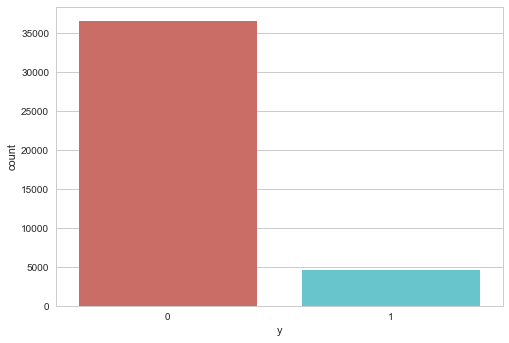

In [8]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [9]:
data.groupby('y').mean()

age    duration  campaign       pdays  previous  emp_var_rate  \
y                                                                        
0  39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
1  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
y                                                         
0       93.603757     -40.593097   3.811491  5176.166600  
1       93.354386     -39.789784   2.123135  5095.115991

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [14]:
data.groupby('AdjDE').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [11]:
data.groupby('marital').mean()

age    duration  campaign       pdays  previous  emp_var_rate  \
marital                                                                         
divorced  44.899393  253.790330   2.61340  968.639853  0.168690      0.163985   
married   42.307165  257.438623   2.57281  967.247673  0.155608      0.183625   
single    33.158714  261.524378   2.53380  949.909578  0.211359     -0.167989   
unknown   40.275000  312.725000   3.18750  937.100000  0.275000     -0.221250   

          cons_price_idx  cons_conf_idx  euribor3m  nr_employed         y  
marital                                                                    
divorced       93.606563     -40.707069   3.715603  5170.878643  0.103209  
married        93.597367     -40.270659   3.745832  5171.848772  0.101573  
single         93.517300     -40.918698   3.317447  5155.199265  0.140041  
unknown        93.471250     -40.820000   3.313038  5157.393750  0.150000

In [12]:
data.groupby('education').mean()

age    duration  campaign       pdays  previous  \
education                                                                    
Basic                42.163910  263.043874  2.559498  974.877967  0.141053   
high.school          37.998213  260.886810  2.568576  964.358382  0.185917   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.080107  252.533855  2.586115  960.765974  0.163075   
university.degree    38.879191  253.223373  2.563527  951.807692  0.192390   
unknown              43.481225  262.390526  2.596187  942.830734  0.226459   

                     emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
education                                                                     
Basic                    0.191329       93.639933     -40.927595   3.729654   
high.school              0.032937       93.584857     -40.940641   3.556157   
illiterate              -0.133333       93.317333     -39.950000   3.516556   
professional.course      0.173012       93.569864     -40.124108   3.710457   
university.degree       -0.028090       93.493466     -39.975805   3.529663   
unknown                  0.059099       93.658615     -39.877816   3.571098   

                     nr_employed         y  
education                                   
Basic                5172.014113  0.087029  
high.school          5164.994735  0.108355  
illiterate           5171.777778  0.222222  
professional.course  5170.155979  0.113485  
university.degree    5163.226298  0.137245  
unknown              5159.549509  0.145003

Visualizations

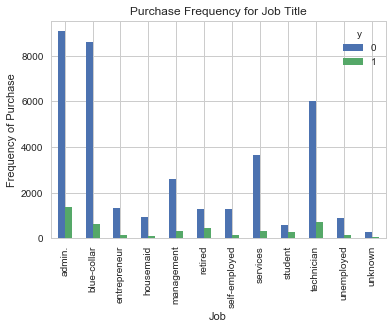

In [13]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

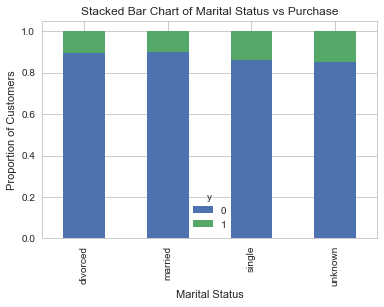

In [14]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

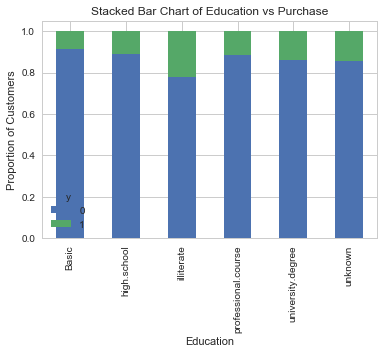

In [15]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

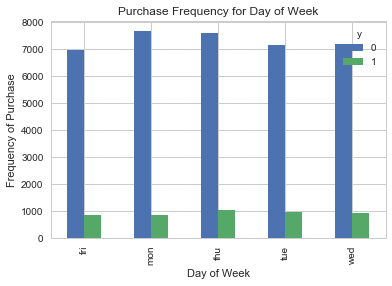

In [16]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome

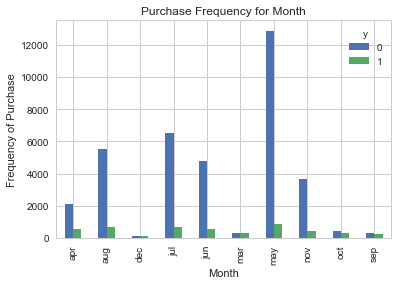

In [22]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

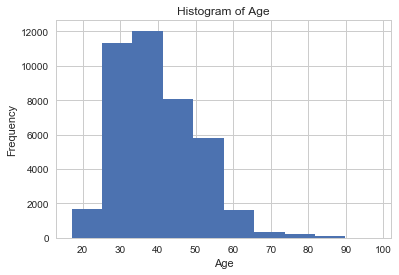

In [17]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

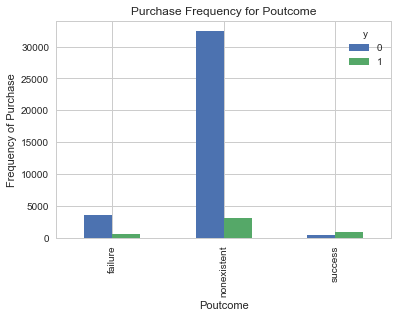

In [18]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [19]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [20]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [21]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [22]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

### Feature Selection

In [23]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Susan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True False False False
  True  True  True False False False  True False False  True  True  True
  True]
[35 33 12 40  1 13 17 16  1 27 11  1 24 39 42  1 31  1  1 19 21 41  2  3  4
 43  6  7 38  8 10 15  1 14 44 36 29 37 20 30 28 23  1  1  1 18 22 25  1  1
  1 32  5  9  1 34 26  1  1  1  1]


The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [25]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

### Implementing the model

In [26]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Sat, 18 Nov 2017   Pseudo R-squ.:                  0.1844
Time:                        02:47:55   Log-Likelihood:                -11826.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2385      0.051      4.642      0.000       0.138       0.339

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting the test set results and caculating the accuracy

In [28]:
y_pred = logreg.predict(X_test)

In [29]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation

In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1122   254]]


The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Accuracy

In [64]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.70      0.18      0.29      1376

avg / total       0.88      0.90      0.87     12357



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

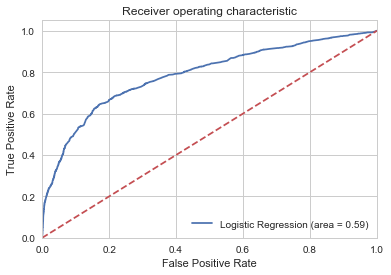

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()